# **Problem Statement:**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Binary classification using Deep Neural Networks Example: Classify movie reviews into
positive" reviews and "negative" reviews, just based on the text content of the reviews.
Use IMDB dataset

About the dataset:

IMDB dataset having 50K movie reviews for natural language processing or Text analytics.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So, predict the number of positive and negative reviews using either classification or deep learning algorithms.

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

pd.set_option('display.max_colwidth', None)

# **Loading the dataset**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DL practicals/IMDB Dataset.csv")
df

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zom

# **EDA:**

Preprocessing the dataset

In [ ]:
df.head()

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zom

In [ ]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,"Loved today's show!!! It was a variety and not solely cooking (which would have been great too). Very stimulating and captivating, always keeping the viewer peeking around the corner to see what was coming up next. She is as down to earth and as personable as you get, like one of us which made the show all the more enjoyable. Special guests, who are friends as well made for a nice surprise too. Loved the 'first' theme and that the audience was invited to play along too. I must admit I was shocked to see her come in under her time limits on a few things, but she did it and by golly I'll be writing those recipes down. Saving time in the kitchen means more time with family. Those who haven't tuned in yet, find out what channel and the time, I assure you that you won't be disappointed.",positive
freq,5,25000


In [ ]:
df.sample(5)

,review,sentiment
43560,"Whenever a Columbo story deviates from the familiar plot (colorful killer commits crime, Columbo smokes out killer, Columbo becomes a pest in the process), the writers somehow are never able to match the quality and interest of most traditional episodes. This episode deviates in the extreme, and the result is a major flop.<br /><br /> Would you believe: Columbo never faces the villain till the very end?!!<br /><br />Frankly, I was tempted to turn it off about two-thirds through.<br /><br /> Oh, the sacrifices we self-appointed reviewers make!!!",negative
37472,"Another tiresome bore from Anthony Minghella, who seems to thrive on these big bloated super-productions that take over two and a half hours to do what any reasonable filmmaker would do in about ninety minutes.<br /><br />The story centers on Inman (a somnambulent Jude Law), who goes off to the Civil War having just barely started a sort-of romance with Nicole Kidman, a Preacher's Daughter who has recently arrived in the prettily photographed backwater town. The story cuts back and forth between Inman's trials and tribulations at war (which is, guess what boys and girls? HELL!!) and Kidman's trials and tribulations back at home (which are, very predictably, incredibly boring). Renee Zellwegger appears on Kidman's farm to help Kidman get it back into shape after Kidman's saintly Daddy dies of Inconvenient Character Disease. Zellwegger acts all squinty and bossy in that Granny Clampett kind of way, dispensing enough Tough Love and Homespun Wisdom to turn the stomach of even the hardiest watcher of Touched By An Angel.<br /><br />This film is, quite simply, excruciating. Avoid it like the big bloated Oscar-bait Bogus Pretentious Literary Adaptation nonsense that it is.",negative
29610,"This is truly the greatest Swedish movie of all time. Not only is it revolutionary in its narration, but its also among the first movies to feature the next generation of Swedish humor and Swedish comedians. Felix Herngren and Fredrik Lindström are two of the most intelligent and witty filmmakers in Sweden today, and this film really puts that on display.<br /><br />""Vuxna människor"" (Adult People) is a warm-hearted and hilarious story about adulthood, and the question if we wouldn´t be better off without it.",positive
21348,"I am sorry folks, but I have to say I really cannot understand the overwhelming feelings everybody gets by seeing this movie...<br /><br />When I saw it I looked at my watch to know how much more time I had to spend with this Kindergarten nonsense.<br /><br />So why this verdict?<br /><br />First of all: The movie tells a story that doesn't deliver any excitement! It is not even the amusingly distorted reality of a Quentin Tarantino we used to know. This story could have come out of every little kid's head. It doesn't have anything intelligent in it, neither anything inventive and it goes on for hours... the story has appropriate content for about 30 min. The rest is just awfully enhanced scenes that are supposed to leave a somewhat cool image. Doesn't work. Even the previously seen cutbacks that Tarantino often uses just confuse and are not in any way cool. <br /><br />Second: Some guys go to Germany and kill Nazis. Ah really? Do they? The only Nazis they killed were a handful of guys, one of them being man enough to rather die than betray his companions. Is this the ugly face Tarantino wanted to give the Nazis? A brave soldier that is more valiant than any of the ""Basterds""? Certainly not --> fail And what happens to the terrible Nazi-killing Basterds? Well they all get killed by Nazis except two who are taken hostages --> wow, what terrible revengeful monsters they are...<br /><br />Third: Any characters? Yes one! The only role and the only gleam of hope for the entire movie is Chritoph Waltz who is building a truly deep and very detailed character here. Great acting! Brad Pitt really sucks and is completely out-acted by Waltz. Never seen

In [ ]:
df.shape

(50000, 2)

In [ ]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

# **Feature Engineering:**

Checking for duplicates

In [ ]:
print(f"Number of Duplicates in the Data: {df.duplicated().sum()}")
print(f"Number of Nulls in the Data: \n {df.isnull().sum()}")

Number of Duplicates in the Data: 418
Number of Nulls in the Data: 
 review       0
sentiment    0
dtype: int64


In [ ]:
X = df['review'][:10000]
y = df['sentiment'][:10000]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
y

array([1, 1, 1, ..., 0, 0, 1])

In [ ]:
le.classes_ # [0, 1]

array(['negative', 'positive'], dtype=object)

# **Model Building/ training and testing:**

Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
y_train = y_train.astype('float32').reshape((-1, 1))
y_test = y_test.astype('float32').reshape((-1, 1))

In [ ]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(8000,) (2000,)
(8000, 1) (2000, 1)


Model Building

In [ ]:
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.layers import Conv1D, Flatten, MaxPooling1D, Dense, LSTM, Embedding, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2

# max_features = 30000 # Number of words in our vocabulary
max_len = 512 # length of the output vectors

In [ ]:
vectorize_layer = TextVectorization(output_mode = 'int', output_sequence_length = max_len)

In [ ]:
%%time
vectorize_layer.adapt(X_train) 

CPU times: user 1.68 s, sys: 70.5 ms, total: 1.75 s
Wall time: 1.78 s


In [ ]:
vocab_len = len(vectorize_layer.get_vocabulary())
vocab_len

66480

In [ ]:
model = Sequential()
model.add(Input(shape=(1,), dtype = tf.string))
model.add(vectorize_layer)
model.add(Embedding(input_dim = vocab_len, output_dim = 256, input_length= max_len))
model.add(Conv1D(32, 5, strides = 1,activation= 'relu', padding = 'same', kernel_regularizer = l2(0.0001)))
model.add(Conv1D(16, 5, strides = 1,activation= 'relu', padding = 'same', kernel_regularizer = l2(0.0001)))
model.add(MaxPooling1D(4, 1, padding = 'same'))
model.add(tf.keras.layers.Bidirectional(LSTM(64, kernel_regularizer = l2(0.0001))))
model.add(Dense(32, activation = 'relu', kernel_regularizer = l2(0.0001)))
model.add(Dense(16, activation = 'relu', kernel_regularizer = l2(0.0001)))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)

In [ ]:
model.compile(optimizer= optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 512)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 512, 256)          17018880  
                                                                 
 conv1d (Conv1D)             (None, 512, 32)           40992     
                                                                 
 conv1d_1 (Conv1D)           (None, 512, 16)           2576      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 512, 16)          0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 128)              4

In [ ]:
%%time
hist = model.fit(X_train, y_train,
          epochs= 6, validation_data = (X_test, y_test))

Epoch 1/6
250/250 [==============================] - 376s 1s/step - loss: 0.6284 - accuracy: 0.6460 - val_loss: 0.6983 - val_accuracy: 0.6455
Epoch 2/6
250/250 [==============================] - 369s 1s/step - loss: 0.3584 - accuracy: 0.8577 - val_loss: 0.4859 - val_accuracy: 0.7850
Epoch 3/6
250/250 [==============================] - 368s 1s/step - loss: 0.1556 - accuracy: 0.9506 - val_loss: 0.5309 - val_accuracy: 0.8120
Epoch 4/6
250/250 [==============================] - 364s 1s/step - loss: 0.0589 - accuracy: 0.9855 - val_loss: 0.7737 - val_accuracy: 0.8090
Epoch 5/6
250/250 [==============================] - 354s 1s/step - loss: 0.0378 - accuracy: 0.9923 - val_loss: 0.8490 - val_accuracy: 0.7480
Epoch 6/6
250/250 [==============================] - 363s 1s/step - loss: 0.0432 - accuracy: 0.9896 - val_loss: 0.9339 - val_accuracy: 0.8220
CPU times: user 45min 24s, sys: 11min 36s, total: 57min 1s
Wall time: 37min 28s


# **Model Evaluation**

Plotting Model Accuracy Performance

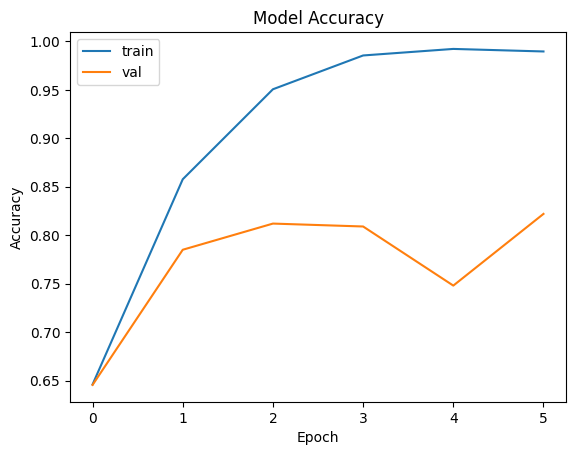

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])
plt.show()

Plotting Model Loss Performance

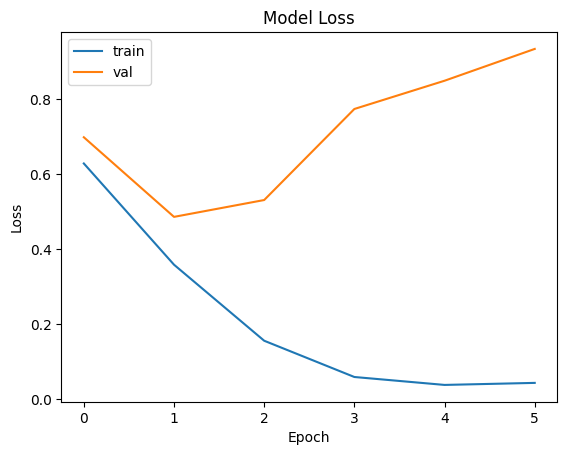

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'])
plt.show()

Prediction

In [ ]:
pred = model.predict(['''So, I'm wondering while watching this film, did the producers of this movie get to save money on Sandra Bullock's wardrobe by dragging out her "before" clothes from Miss Congeniality? Did Ms. Bullock also get to sleepwalk through the role by channeling the "before" Gracie Hart? As many reviewers have noted before, the film is very formulaic. Add to that the deja vu viewer experiences with the character of Cassie Maywether as a somewhat darker Gracie Hart with more back story and it rapidly become a snooze fest.<br /><br />The two bad boy serial killers have been done before (and better) in other films. As has the "good guy partner trying to protect his partner despite the evidence" character been seen before. In fact none of the characters in the film ever get beyond two dimensions or try to be anything but trite stereotypes.<br /><br />One last peeve - using the term serial killer is false advertising. Murdering one person - even if it's a premeditated murder - does not make you a serial killer. You may have the potential to become a serial killer but you are not a serial killer or even a spree killer.''',])

1/1 [==============================] - 1s 1s/step


In [ ]:
pred > 0.5

array([[False]])

In [ ]:
pred2 = model.predict(['''Petter Mattei's "Love in the Time of Money" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter. <br /><br />This being a variation on the Arthur Schnitzler's play about the same theme, the director transfers the action to the present time New York where all these different characters meet and connect. Each one is connected in one way, or another to the next person, but no one seems to know the previous point of contact. Stylishly, the film has a sophisticated luxurious look. We are taken to see how these people live and the world they live in their own habitat.<br /><br />The only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits. A big city is not exactly the best place in which human relations find sincere fulfillment, as one discerns is the case with most of the people we encounter.<br /><br />The acting is good under Mr. Mattei's direction. Steve Buscemi, Rosario Dawson, Carol Kane, Michael Imperioli, Adrian Grenier, and the rest of the talented cast, make these characters come alive.<br /><br />We wish Mr. Mattei good luck and await anxiously for his next work.'''])

1/1 [==============================] - 0s 101ms/step


In [ ]:
pred2 > 0.5

array([[ True]])

In [ ]:
pred2

array([[0.99969757]], dtype=float32)

Defining a function for inference, in this function we will assume a negative sentiment if prediction not greater than 0.5 and positive sentiment if prediction is greater than 0.5

In [ ]:
def predict_sentiment(text, model):
    text = [text]
    pred = model.predict(text)
    print(pred)
    if pred > 0.5:
        return "Positive"
    else:
        return "Negative"

In [ ]:
pst_txt = '''One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.'''
predict_sentiment(pst_txt, model)

1/1 [==============================] - 0s 82ms/step
[[0.99880207]]


'Positive'

In [ ]:
ngt_txt ='''Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them.'''
predict_sentiment(ngt_txt, model)

1/1 [==============================] - 0s 95ms/step
[[0.00022684]]


'Negative'

In [ ]:
ngt_txt2 = '''It's become extremely difficult to find a good horror movie anymore, thought this movie was a good thriller.<br /><br />Could have had better production values but what kept me going was the suspense and the twists. I had real reservations before seeing this movie (because of the cover). I was afraid that it would be excessively bloody and gory. I was wrong.<br /><br />Although there is a lot of scary parts, there is a lot of suspense and drama too.<br /><br />The acting in Dead Line was better than what you would expect from a micro budget horror flick. The characters were believable<br /><br />The movie is really thrilling and quite scary at moments so it makes you grab your seat until the ending credits roll<br /><br />Because of its production values (the sound is not very good for example) 8/10.'''
predict_sentiment(ngt_txt2, model)

1/1 [==============================] - 0s 93ms/step
[[0.92934626]]


'Positive'

In [ ]:
text3 = '''This movie is incredible. If you have the chance, watch it. Although, a warning, you'll cry your eyes out. I do, every time I see it, and I own it and have watched it many times. The performances are outstanding. It deals with darkness and pain and loss, but there is hope. This movie made me look at the world differently: vicarious experience, according to my English teacher. Also, if you've seen it, note the interesting use of shadows and light. Home room is a phenomenal movie, and I rate it 10/10 - for real - because of the excellent acting, amazing plot, and heart-wrenching dialogue. Very tense, very moving. Doesn't give all the answers, but makes many good points about humankind'''
predict_sentiment(text3, model)

1/1 [==============================] - 0s 93ms/step
[[0.999273]]


'Positive'

Loading the model


In [ ]:
txt = '''What a frustrating movie. A small Southern town is overflowing with possibilities for exploring the complexities of interpersonal relationships and dark underbellies hidden beneath placid surfaces, as anyone who has read anything by Carson McCullers already knows. This does none of that. Instead, the writers settled for cutesy twinkles, cheap warm fuzzies and banal melodrama. The thing looks like a made-for-TV movie, and was directed with no particular distinction, but it's hard to imagine what anyone could have done to make this material interesting.<br /><br />The most frustrating aspect, though, is the fact that there are a lot of extremely competent and appealing actors in this cast, all trying gamely to make the best of things and do what they can with this--well, there's no other word for it--drivel. A tragic waste of talent, in particular that of the great Stockard Channing.'''
predict_sentiment(txt, model)

1/1 [==============================] - 0s 86ms/step
[[0.06642344]]


'Negative'